# Project: Clustering of Price and MPG.city, To find out the similar car Recommendation

# Importing important libraries

In [2]:
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")

# Read the dataset

In [3]:
A = pd.read_csv("C:/Users/JOHN/Downloads/Cars93.csv")
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


# from the above dataset taking "Price" and "MPG.city" columns and clustering of it

In [4]:
A[["Price","MPG.city"]]
# we want to cluster this two columns

,Price,MPG.city
0,15.9,25
1,33.9,18
2,29.1,20
3,37.7,19
4,30.0,22
...,...,...
88,19.7,17
89,20.0,21
90,23.3,18
91,22.7,21


# Standerization by MinMaxScaler

In [6]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
Q = pd.DataFrame(mm.fit_transform(A[["Price","MPG.city"]]),columns=["Price","MPG.city"])# data in form of array,converting it into data frame

# Applying KMeans clustering Model

In [7]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
model = km.fit(Q)
model.labels_

# labels represent which value belong to which cluster

array([4, 2, 1, 2, 1, 4, 1, 1, 1, 2, 2, 4, 4, 1, 4, 1, 1, 1, 2, 1, 4, 1,
       0, 4, 4, 1, 4, 1, 0, 1, 0, 4, 4, 4, 4, 1, 1, 1, 3, 0, 4, 3, 4, 0,
       4, 0, 4, 2, 1, 2, 2, 2, 0, 0, 4, 1, 2, 2, 2, 4, 1, 0, 1, 0, 4, 1,
       1, 4, 4, 1, 1, 4, 0, 4, 1, 1, 1, 1, 0, 0, 4, 4, 3, 0, 4, 4, 1, 4,
       1, 1, 1, 1, 1])

In [8]:
W = A[["Price","MPG.city"]]
W["Cluster"] = model.labels_
W["Model"]  = A[["Make"]] # Make ---> Model + Brand

In [9]:
W

,Price,MPG.city,Cluster,Model
0,15.9,25,4,Acura Integra
1,33.9,18,2,Acura Legend
2,29.1,20,1,Audi 90
3,37.7,19,2,Audi 100
4,30.0,22,1,BMW 535i
...,...,...,...,...
88,19.7,17,1,Volkswagen Eurovan
89,20.0,21,1,Volkswagen Passat
90,23.3,18,1,Volkswagen Corrado
91,22.7,21,1,Volvo 240


# Prediction the similar kind of car by Price and MPG.city

In [11]:
a = input("Select your car, and we will give you recommendation for similar car also.")
cluster_number =  W[W.Model == a].Cluster.values[0]
similar_cars = list(W[W.Cluster == cluster_number].Model)
similar_cars

Select your car, and we will give you recommendation for similar car also.Acura Integra


['Acura Integra',
 'Buick Century',
 'Chevrolet Cavalier',
 'Chevrolet Corsica',
 'Chevrolet Lumina',
 'Chrysler LeBaron',
 'Dodge Shadow',
 'Dodge Spirit',
 'Dodge Dynasty',
 'Ford Escort',
 'Ford Tempo',
 'Ford Mustang',
 'Ford Probe',
 'Honda Prelude',
 'Honda Accord',
 'Hyundai Elantra',
 'Hyundai Sonata',
 'Mazda 626',
 'Mercury Capri',
 'Nissan Altima',
 'Oldsmobile Achieva',
 'Oldsmobile Cutlass_Ciera',
 'Plymouth Laser',
 'Pontiac Sunbird',
 'Subaru Loyale',
 'Subaru Legacy',
 'Toyota Celica',
 'Toyota Camry',
 'Volkswagen Fox']

In [12]:
similar_cars

['Acura Integra',
 'Buick Century',
 'Chevrolet Cavalier',
 'Chevrolet Corsica',
 'Chevrolet Lumina',
 'Chrysler LeBaron',
 'Dodge Shadow',
 'Dodge Spirit',
 'Dodge Dynasty',
 'Ford Escort',
 'Ford Tempo',
 'Ford Mustang',
 'Ford Probe',
 'Honda Prelude',
 'Honda Accord',
 'Hyundai Elantra',
 'Hyundai Sonata',
 'Mazda 626',
 'Mercury Capri',
 'Nissan Altima',
 'Oldsmobile Achieva',
 'Oldsmobile Cutlass_Ciera',
 'Plymouth Laser',
 'Pontiac Sunbird',
 'Subaru Loyale',
 'Subaru Legacy',
 'Toyota Celica',
 'Toyota Camry',
 'Volkswagen Fox']

In [13]:
A[["Make"]]

,Make
0,Acura Integra
1,Acura Legend
2,Audi 90
3,Audi 100
4,BMW 535i
...,...
88,Volkswagen Eurovan
89,Volkswagen Passat
90,Volkswagen Corrado
91,Volvo 240


# Elbow Curve(X(K),Y(WCSS(Inertia))) :

For each value of K, we are calculating WCSS ( Within-Cluster Sum of Square ). WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease

In [14]:
wcss = []
K = range(1,20,1)
for i in K:
    km = KMeans(n_clusters=i)
    model = km.fit(Q)
    wcss.append(model.inertia_)

In [15]:

K

range(1, 20)

In [16]:
wcss

[5.913485432978065,
 2.984556204508492,
 1.7604339512829656,
 1.2111248917250903,
 0.8192793244565985,
 0.553661513906029,
 0.4430024390535746,
 0.3702548013029325,
 0.3201232402198999,
 0.2778537638598535,
 0.2526828142408572,
 0.2298158721381085,
 0.2023207093483783,
 0.17278898478796895,
 0.16143625477650667,
 0.1414531952763495,
 0.12503283922173106,
 0.11252448086449925,
 0.10601837750286233]

# Finding out the best value of K by using Elbow curve

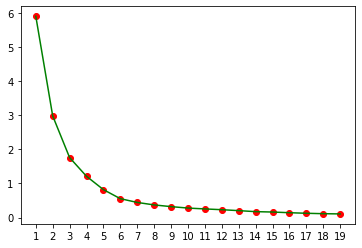

In [17]:
import matplotlib.pyplot as plt
plt.scatter(K,wcss,c = "red")
plt.plot(K,wcss,"green")
plt.xticks(range(1,20,1))
plt.show()

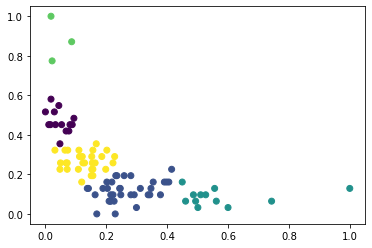

In [18]:
plt.scatter(Q.Price,Q["MPG.city"],c = W.Cluster)

In [19]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
model = km.fit(Q)
model.labels_
model.cluster_centers_

array([[0.12900981, 0.26585095],
       [0.57400612, 0.08602151],
       [0.26422018, 0.11889401],
       [0.04220183, 0.88172043],
       [0.04718218, 0.46774194]])

In [20]:
w1 = pd.DataFrame(model.cluster_centers_,columns=["X","Y"])

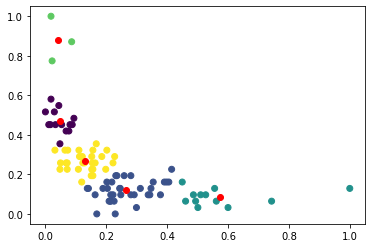

In [21]:
plt.scatter(Q.Price,Q["MPG.city"],c = W.Cluster)
plt.scatter(w1.X,w1.Y,color = "red")

4 is the best value of k